## Exploratory Data Analysis
#### Author: `Volodimir Fedin`



#### 1 Які топ 15 каналів домінують по типу повідомлень?

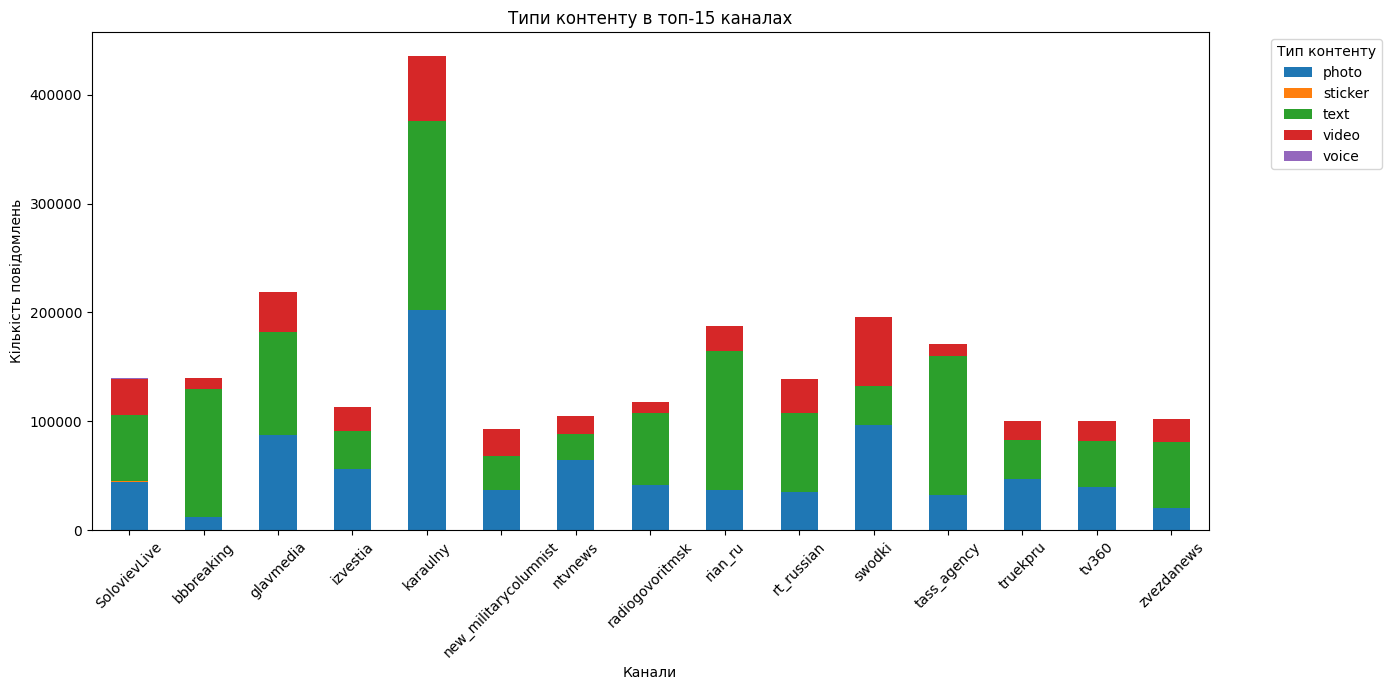

In [24]:
channel_post_counts = df['dialog_id'].value_counts().head(15)

top_channels_df = df[df['dialog_id'].isin(channel_post_counts.index)]

top_channel_names = top_channels_df['frw_from_name'].unique()

content_type_counts = top_channels_df.groupby(['dialog_id', 'type']).size().unstack(fill_value=0)

content_type_counts.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Типи контенту в топ-15 каналах')
plt.xlabel('Канали')
plt.ylabel('Кількість повідомлень')
plt.xticks(rotation=45)
plt.legend(title="Тип контенту", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2 Скільки унікальних каналів представлено в датасеті?

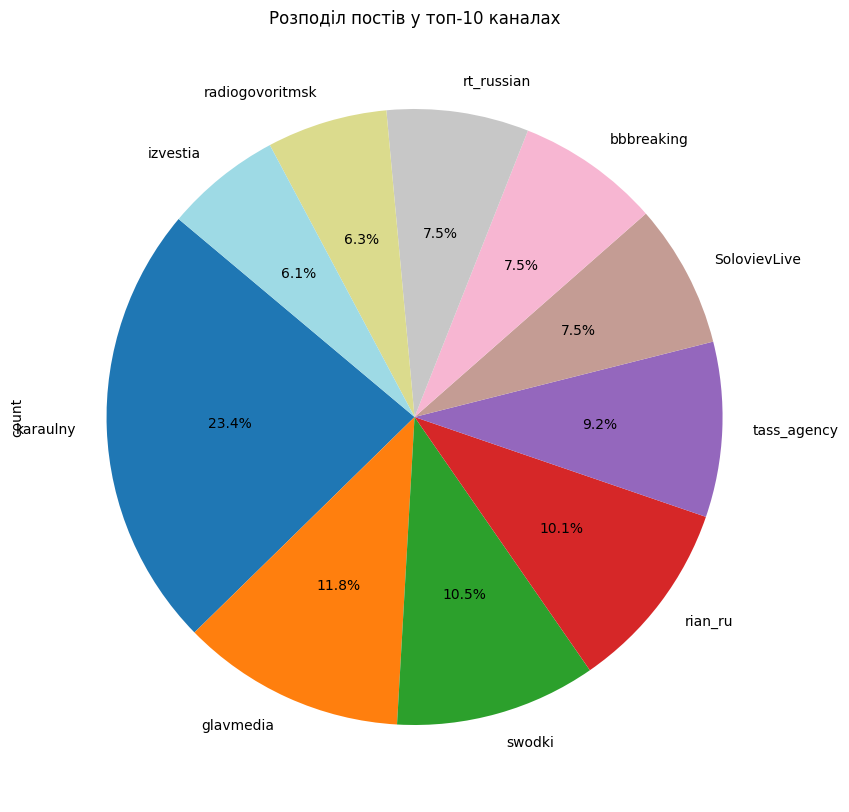

In [6]:
unique_channels = df['dialog_id'].nunique()
channel_post_counts = df['dialog_id'].value_counts()

plt.figure(figsize=(10, 10))
channel_post_counts[:10].plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Розподіл постів у топ-10 каналах')
plt.show()

#### 3 Який топ 5 популярних слів по переглядам?

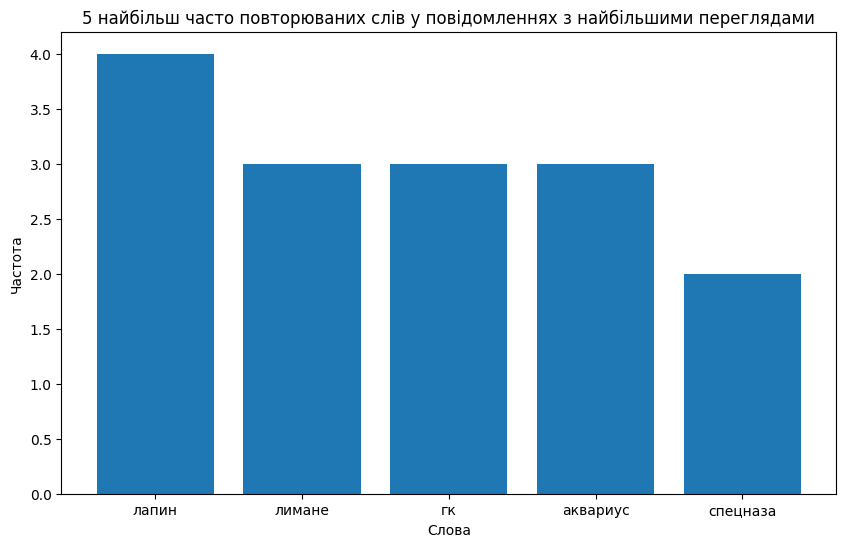

In [19]:
top_views_df = df.nlargest(5, 'views')

def clean_text(text):
    text = re.sub(r'[^a-zA-Zа-яА-Я\s]', '', text.lower())
    return text

top_views_df['cleaned_message'] = top_views_df['message'].apply(clean_text)
top_words = ' '.join(top_views_df['cleaned_message']).split()

custom_stopwords = set([
    'и', 'в', 'не', 'это', 'на', 'что', 'с', 'по', 'для', 'как', 'так', 'за', 'сейчас', 'то', 'к', 'же', 'от', 'мне',
    'бы', 'также', 'еще', 'да', 'или', 'можно', 'все', 'мы', 'вы', 'он', 'она', 'оно', 'они', 'я', 'ты', 'для', 'если',
    'когда', 'уж', 'о', 'при', 'тот', 'этот', 'такой', 'вот', 'зачем', 'вдруг', 'из', 'только', 'всего', 'даже', 'нет',
    'эти', 'чтобы', 'наоборот', 'жизни','а','которые','но','их','правды','до','поэтому','его','стать','более','пытаются','встретим','рассвет','знают'
])

filtered_words = [word for word in top_words if word not in custom_stopwords]

word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(5)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('5 найбільш часто повторюваних слів у повідомленнях з найбільшими переглядами')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.xticks(rotation=360)
plt.show()

#### 4 Яка кількість негативу і позитиву?

In [17]:
# Списки позитивних і негативних слів
positive_words = ["хорошо", "чудесно", "успех", "радость", "счастье", "поддержка"]
negative_words = ["плохо", "ужасно", "провал", "злость", "горе", "проблема"]

# Функція для підрахунку слів із заданого списку
def count_words(text, word_list):
    if pd.isna(text):
        return 0
    words = re.findall(r'\w+', text.lower())
    return sum(1 for word in words if word in word_list)

# Додавання колонок з кількістю позитивних і негативних слів
df['positive_word_count'] = df['message'].apply(lambda text: count_words(text, positive_words))
df['negative_word_count'] = df['message'].apply(lambda text: count_words(text, negative_words))

# Підрахунок загальної кількості позитивних і негативних слів
total_positive = df['positive_word_count'].sum()
total_negative = df['negative_word_count'].sum()

print(f"Загальна кількість позитивних слів: {total_positive}")
print(f"Загальна кількість негативних слів: {total_negative}")

Загальна кількість позитивних слів: 145459
Загальна кількість негативних слів: 103737


#### 5 Актуальність слова україна по роках?

C:\Users\dinmy\AppData\Local\Temp\ipykernel_23428\3283174286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_mentions.loc[:, 'year'] = pd.to_datetime(ukraine_mentions['date']).dt.year


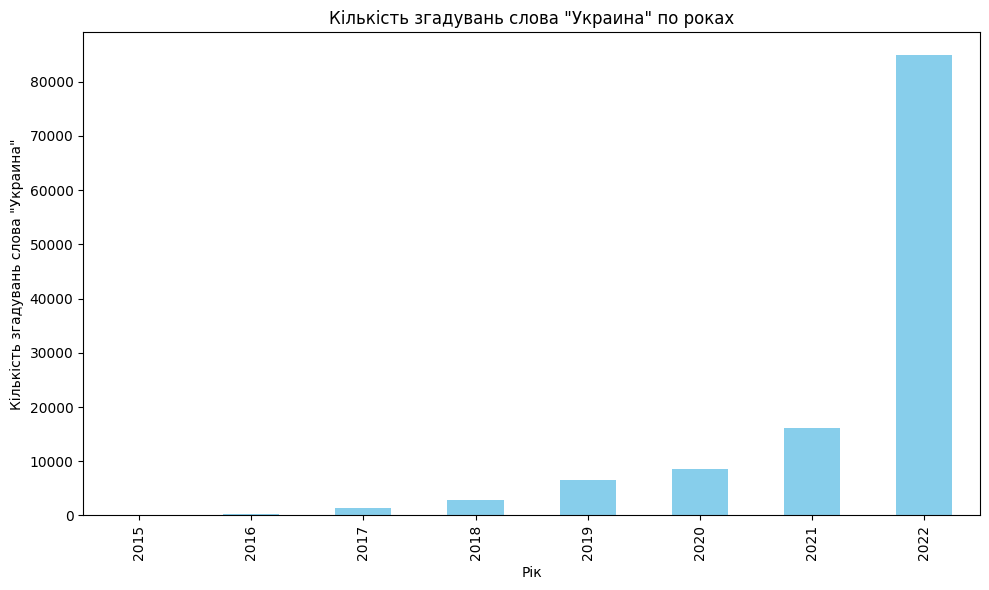

In [25]:
ukraine_mentions = df[df['message'].str.contains(r'\bУкраина\b', case=False, na=False)]

ukraine_mentions.loc[:, 'year'] = pd.to_datetime(ukraine_mentions['date']).dt.year

yearly_mentions = ukraine_mentions['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_mentions.plot(kind='bar', color='skyblue')
plt.xlabel('Рік')
plt.ylabel('Кількість згадувань слова "Украина"')
plt.title('Кількість згадувань слова "Украина" по роках')
plt.tight_layout()
plt.show()

#### 6 Яка найпоширеніша тривалість аудіоповідомлень у датасеті?

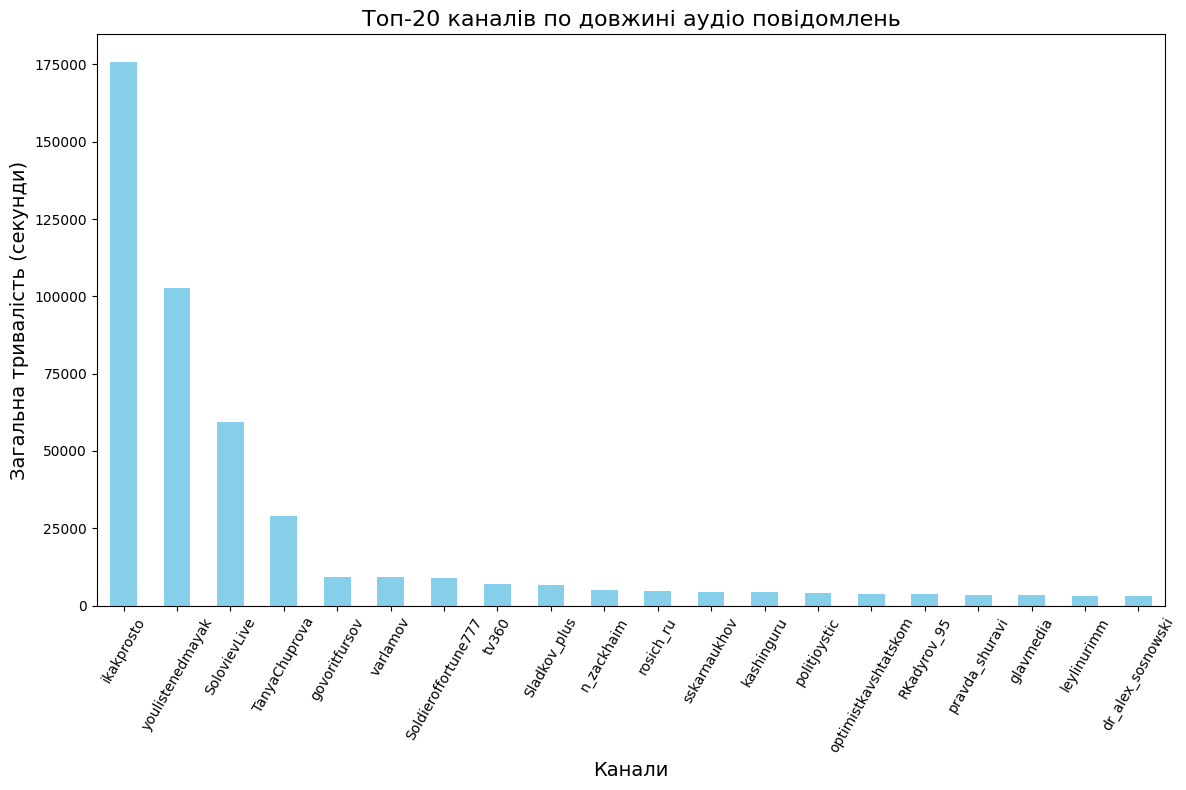

In [28]:
voice_messages = df[df['type'] == 'voice']

channel_voice_durations = voice_messages.groupby('dialog_id')['duration'].sum()

top_20_channels_voice = channel_voice_durations.nlargest(20)

plt.figure(figsize=(12, 8))
top_20_channels_voice.plot(kind='bar', color='skyblue')

plt.title('Топ-20 каналів по довжині аудіо повідомлень', fontsize=16)
plt.xlabel('Канали', fontsize=14)
plt.ylabel('Загальна тривалість (секунди)', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()

#### 7 Який канал має найбільшу кількість постів у датасеті?

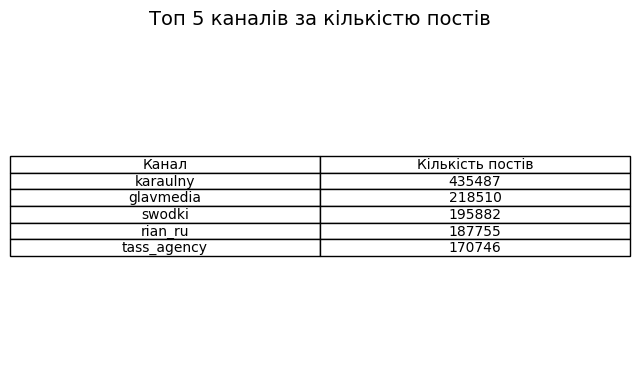

In [7]:
top_channels = df['dialog_id'].value_counts().head(5).reset_index()
top_channels.columns = ['Канал', 'Кількість постів']

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=top_channels.values, colLabels=top_channels.columns, cellLoc="center", loc="center")

plt.title("Топ 5 каналів за кількістю постів", fontsize=14, pad=20)
plt.show()

#### 8 Як часто використовуються теми війни, національної гордості, релігії або економічної стабільності?

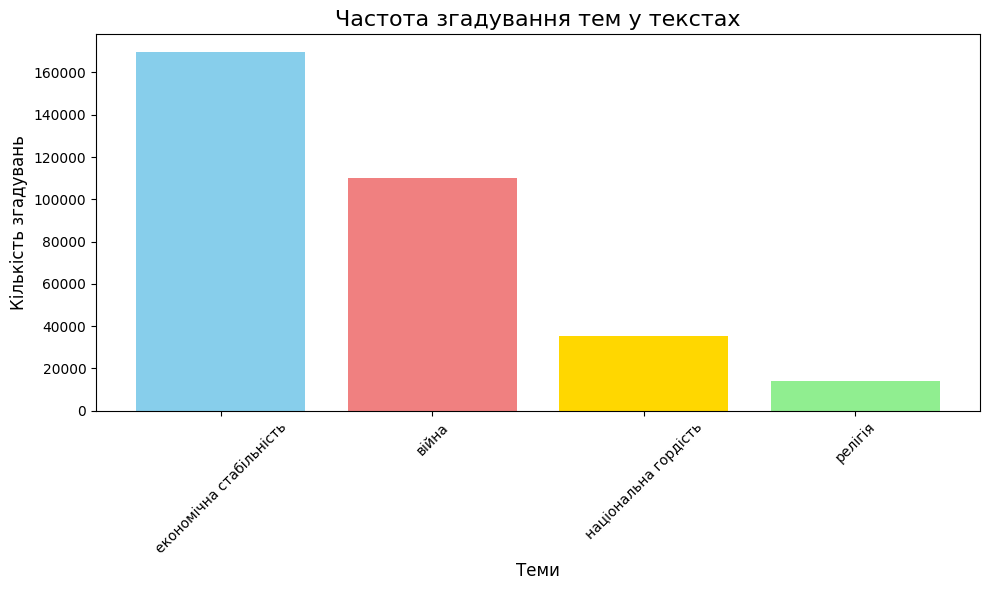

In [10]:
themes = {
    "війна": ["война", "конфликт", "атака", "военный", "оккупация"],
    "національна гордість": ["гордость", "победа", "сила", "нация", "герои", "патриотизм"],
    "релігія": ["церковь", "религия", "вера", "Бог", "духовность", "православие"],
    "економічна стабільність": ["экономика", "кризис", "стабильность", "деньги", "работа", "зарплата"]
}

def count_theme_mentions_fast(text, theme_keywords):
    tokens = set(str(text).lower().split())  # Токенізуємо текст і переводимо в множину
    theme_counts = {theme: sum(kw in tokens for kw in keywords) for theme, keywords in theme_keywords.items()}
    return theme_counts

theme_mentions = df['message'].apply(lambda x: count_theme_mentions_fast(x, themes))

total_theme_mentions = Counter()
for counts in theme_mentions:
    total_theme_mentions.update(counts)

theme_df = pd.DataFrame(total_theme_mentions.items(), columns=['Тема', 'Кількість']).sort_values(by='Кількість', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(theme_df['Тема'], theme_df['Кількість'], color=["skyblue", "lightcoral", "gold", "lightgreen"])
plt.title("Частота згадування тем у текстах", fontsize=16)
plt.xlabel("Теми", fontsize=12)
plt.ylabel("Кількість згадувань", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### 9 Які ключові меседжі спрямовані на дискредитацію України та її партнерів?

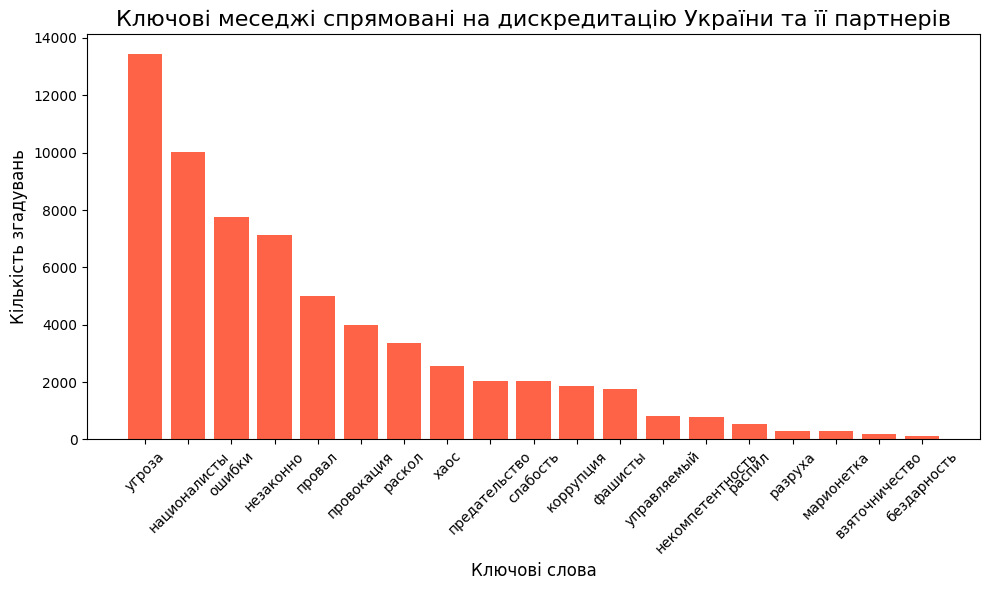

In [14]:
keywords = [
    "коррупция", "взяточничество", "распил", "незаконно",
    "некомпетентность", "провал", "бездарность", "ошибки",
    "марионетка", "западный диктат", "управляемый", "влияние США",
    "предательство", "угроза", "хаос", "разруха", "слабость",
    "националисты", "фашисты", "раскол", "провокация", "западные кукловоды"
]

def find_discredit_messages_fast(text, keywords_set):
    tokens = set(str(text).lower().split())
    return list(tokens.intersection(keywords_set))

keywords_set = set(keywords)

df['discredit_keywords'] = df['message'].apply(lambda x: find_discredit_messages_fast(x, keywords_set))

discredit_messages = df[df['discredit_keywords'].apply(len) > 0]

keyword_counts = Counter(sum(discredit_messages['discredit_keywords'], []))

discredit_df = pd.DataFrame(keyword_counts.items(), columns=['Ключові слова', 'Кількість']).sort_values(by='Кількість', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(discredit_df['Ключові слова'], discredit_df['Кількість'], color='tomato')
plt.title("Ключові меседжі спрямовані на дискредитацію України та її партнерів", fontsize=16)
plt.xlabel("Ключові слова", fontsize=12)
plt.ylabel("Кількість згадувань", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### 10 Який відсоток повідомлень містить згадки про інші канали?

Відсоток повідомлень, що містять згадки про інші канали: 12.77%


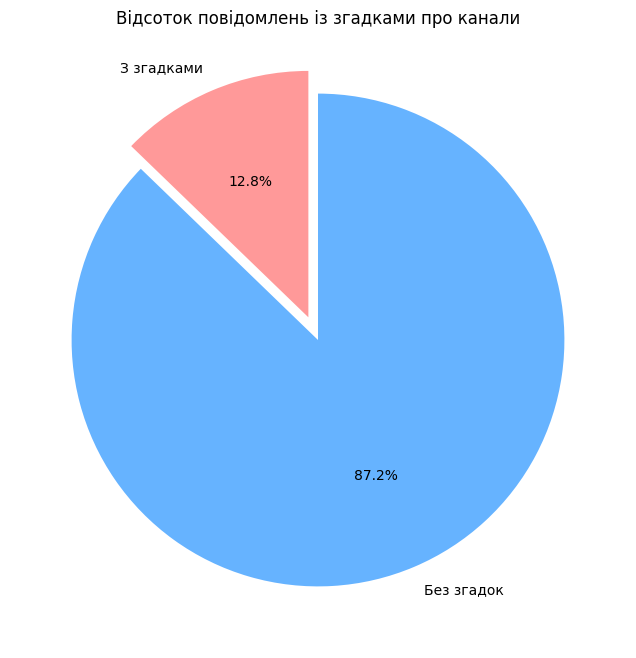

In [7]:
channel_pattern = r'@[\w\d_]+|PeerChannel'
messages_with_mentions = df[df['message'].str.contains(channel_pattern, na=False, regex=True)]

total_messages = len(df)
messages_with_channel_mentions = len(messages_with_mentions)
percentage_mentions = (messages_with_channel_mentions / total_messages) * 100

# Виведення відсотка повідомлень зі згадками
print(f"Відсоток повідомлень, що містять згадки про інші канали: {percentage_mentions:.2f}%")

# Побудова кругової діаграми
labels = ['З згадками', 'Без згадок']
sizes = [messages_with_channel_mentions, total_messages - messages_with_channel_mentions]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Відсоток повідомлень із згадками про канали")
plt.show()

#### 11 Скільки закликів було до війни і після?

Кількість закликів до дії до 24.02.2022: 9301
Кількість закликів до дії після 24.02.2022: 10601


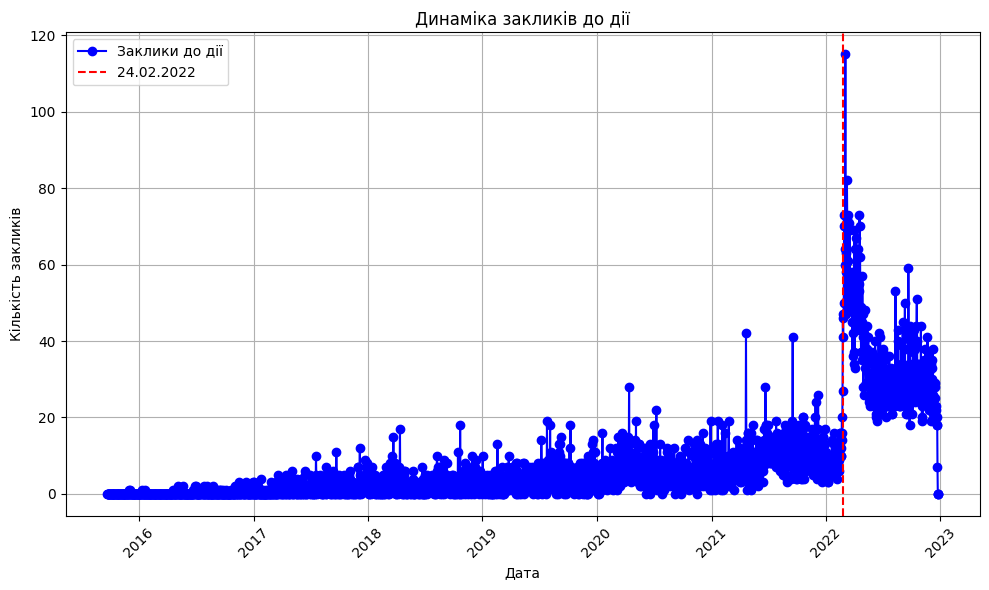

In [12]:
def contains_call_to_action(text):
    call_to_action_phrases = [
        "сделайте", "підпишіться", "делитесь", "поддержите", 
        "расскажите", "помогите", "голосуйте", "распространяйте", "действуйте"
    ]
    if pd.isna(text):
        return False
    return any(phrase in text.lower() for phrase in call_to_action_phrases)

df['has_call_to_action'] = df['message'].apply(contains_call_to_action)

df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)

# Порівняння з датою 24.02.2022
date_threshold = datetime(2022, 2, 24)
before_date = df[df['date'] < date_threshold]
after_date = df[df['date'] >= date_threshold]

# Підрахунок кількості закликів до дії
calls_before = before_date['has_call_to_action'].sum()
calls_after = after_date['has_call_to_action'].sum()

print(f"Кількість закликів до дії до 24.02.2022: {calls_before}")
print(f"Кількість закликів до дії після 24.02.2022: {calls_after}")

df['date_only'] = df['date'].dt.date  # Перетворення на дату без часу
grouped_data = df.groupby('date_only')['has_call_to_action'].sum().reset_index()

# Створення фігури
plt.figure(figsize=(10, 6))

# Додавання даних на графік
plt.plot(grouped_data['date_only'], grouped_data['has_call_to_action'], label='Заклики до дії', color='blue', marker='o')

# Вертикальна лінія для відображення дати 24.02.2022
plt.axvline(date_threshold, color='red', linestyle='--', label='24.02.2022')

# Налаштування графіка
plt.title('Динаміка закликів до дії')
plt.xlabel('Дата')
plt.ylabel('Кількість закликів')
plt.legend()
plt.grid(True)

# Повертаємо метки на осях
plt.xticks(rotation=45)
plt.tight_layout()

# Показуємо графік
plt.show()

#### 12 Скільки унікальних користувачів згадується?

In [37]:
mention_pattern = r'@(\w+)'

mentions = df['message'].dropna().apply(lambda x: re.findall(mention_pattern, x))

unique_users = set([mention for sublist in mentions for mention in sublist])

unique_users_count = len(unique_users)

print("Кількість унікальних згаданих користувачів:", unique_users_count)

Кількість унікальних згаданих користувачів: 26248


#### 13 Рівень адекватності

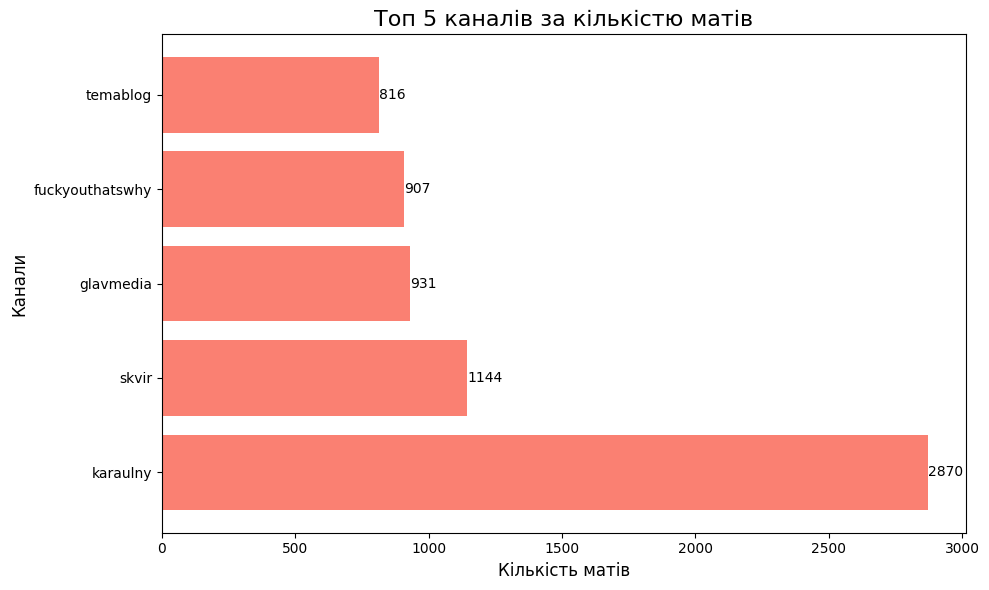

In [24]:
profanity_words = ['сука', 'блять', 'нахуй', 'ебать']

def count_profanity(text, profanity_words):
    return sum(1 for word in profanity_words if word in text.lower())

df['profanity_count'] = df['message'].apply(lambda x: count_profanity(str(x), profanity_words))

channel_profanity_count = df.groupby('dialog_id')['profanity_count'].sum()

sorted_channels = channel_profanity_count.sort_values(ascending=False)

top_5_channels = sorted_channels.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_channels.index, top_5_channels.values, color='salmon')
plt.title('Топ 5 каналів за кількістю матів', fontsize=16)
plt.xlabel('Кількість матів', fontsize=12)
plt.ylabel('Канали', fontsize=12)

for index, value in enumerate(top_5_channels.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### 14 Скільки раз згадували іноземні платформи?

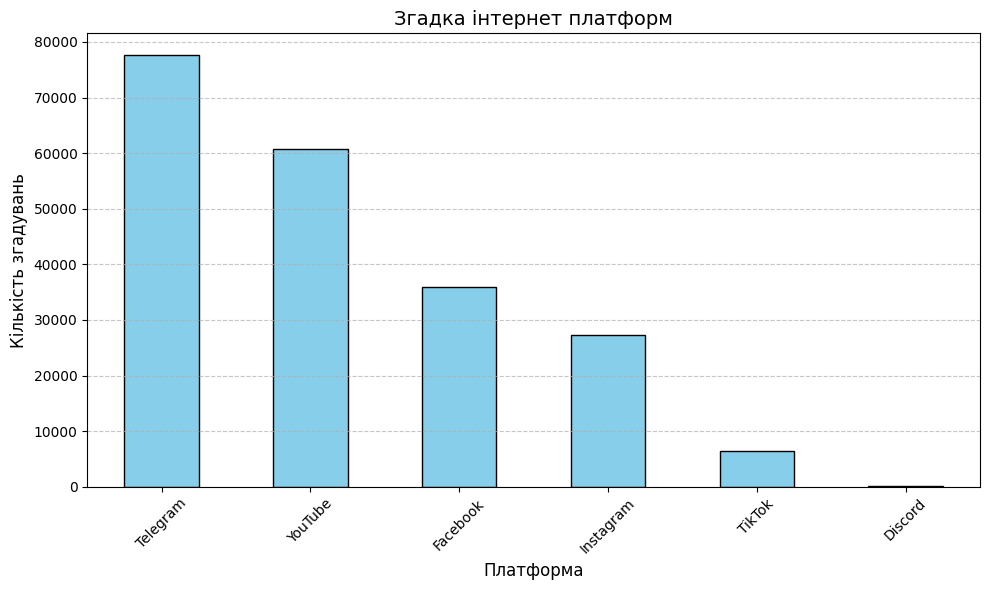

In [20]:
platforms = ['Instagram', 'TikTok', 'Telegram', 'Facebook', 'YouTube', 'Discord']

for platform in platforms:
    df[platform] = df['message'].str.contains(platform, case=False, na=False).astype(int)

platform_counts = df[platforms].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Згадка інтернет платформ', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Кількість згадувань', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 15 Чи є канали без якогось типу повідомлень?

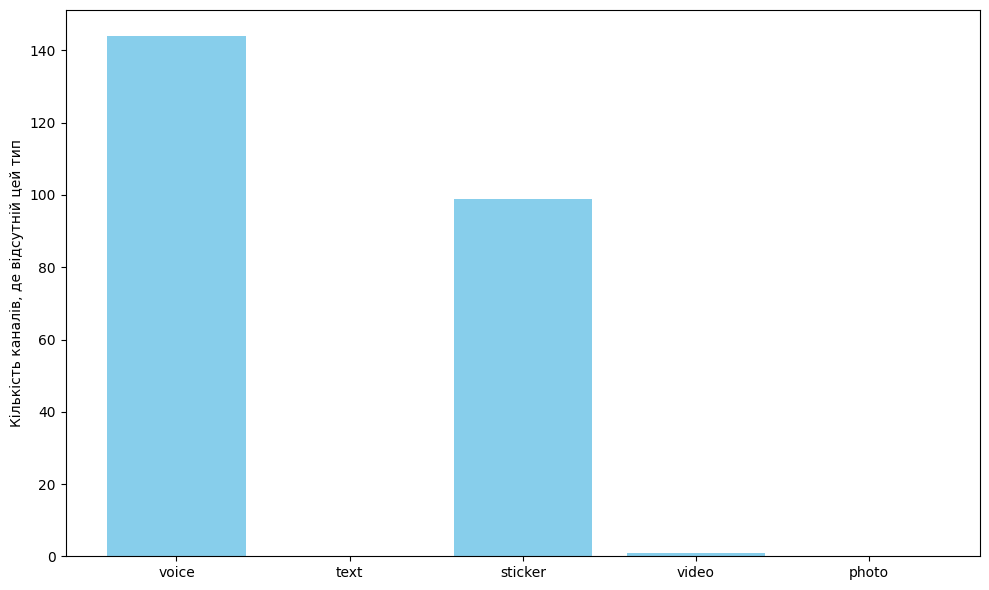

In [18]:
types_to_check = ['voice', 'text', 'sticker', 'video', 'photo']

channel_message_types = df.groupby('dialog_id')['type'].apply(lambda x: set(x.unique()))

channels_missing_types = {
    channel: [message_type for message_type in types_to_check if message_type not in message_types]
    for channel, message_types in channel_message_types.items()
    if any(message_type not in message_types for message_type in types_to_check)
}

missing_type_counts = {type_: sum(1 for missing_types in channels_missing_types.values() if type_ in missing_types) for type_ in types_to_check}

plt.figure(figsize=(10, 6))
plt.bar(missing_type_counts.keys(), missing_type_counts.values(), color='skyblue')
plt.ylabel('Кількість каналів, де відсутній цей тип')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


#### 16 Чи існують закономірності у часі публікації повідомлень і кількості їх переглядів?

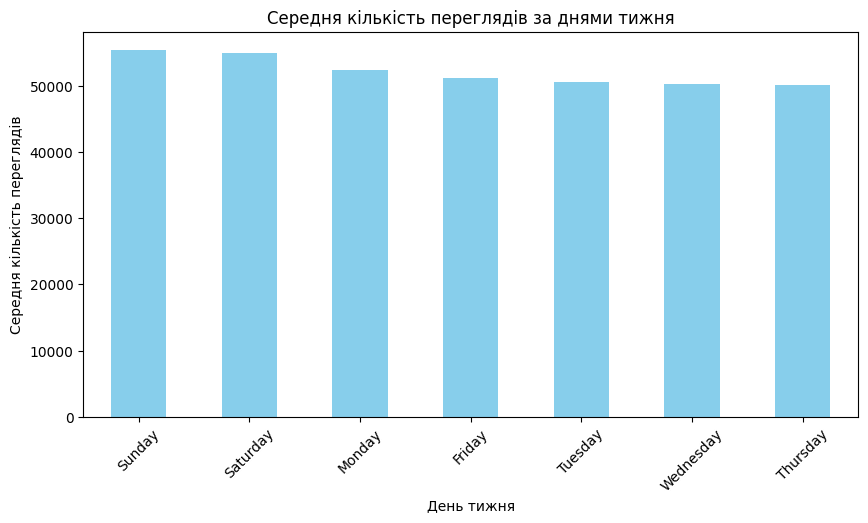

In [27]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = df['date'].dt.day_name()

views_by_day = df.groupby('day_of_week')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
views_by_day.plot(kind='bar', color='skyblue')
plt.title('Середня кількість переглядів за днями тижня')
plt.ylabel('Середня кількість переглядів')
plt.xlabel('День тижня')
plt.xticks(rotation=45)
plt.show()

#### 17 Скільки повідомлень було розміщено у вихідні дні в порівнянні з буднями?

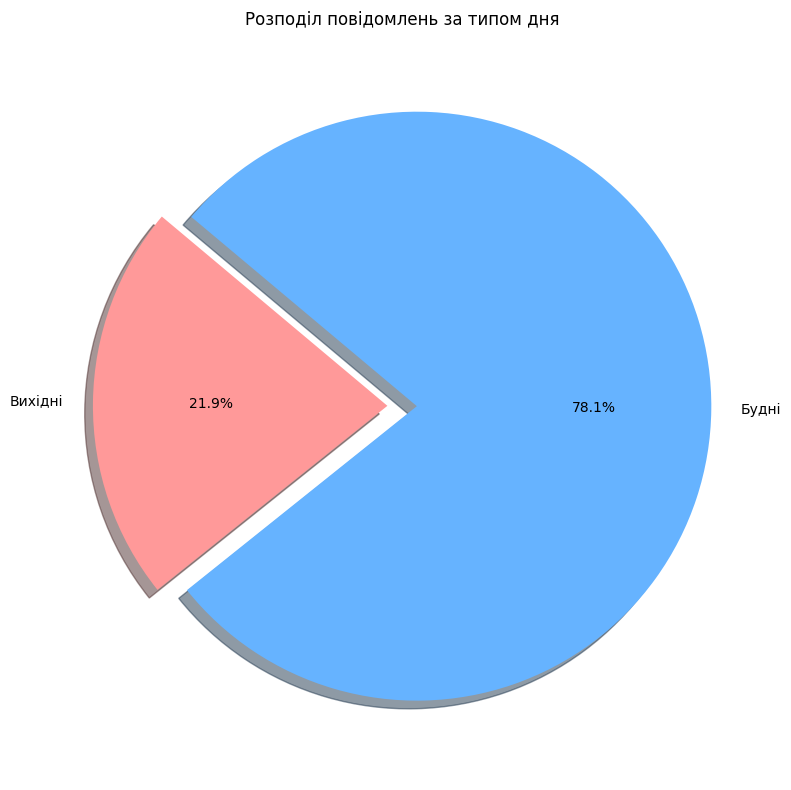

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = df['date'].dt.weekday

weekends = df[df['day_of_week'].isin([5, 6])]
weekdays = df[df['day_of_week'].isin([0, 1, 2, 3, 4])]

num_weekends = len(weekends)
num_weekdays = len(weekdays)

labels = ['Вихідні', 'Будні']
sizes = [num_weekends, num_weekdays]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Розподіл повідомлень за типом дня')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### 18 Чи є залежність між часом доби публікації повідомлень і кількістю переглядів?

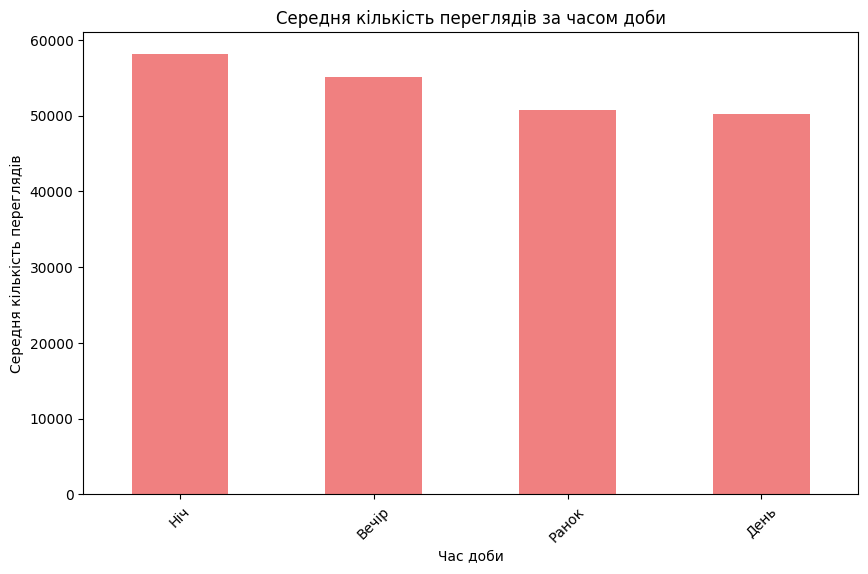

In [31]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Ранок'
    elif 12 <= hour < 17:
        return 'День'
    elif 17 <= hour < 21:
        return 'Вечір'
    else:
        return 'Ніч'

df['time_of_day'] = df['date'].dt.hour.apply(get_time_of_day)

views_by_time_of_day = df.groupby('time_of_day')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
views_by_time_of_day.plot(kind='bar', color='lightcoral')
plt.title('Середня кількість переглядів за часом доби')
plt.xlabel('Час доби')
plt.ylabel('Середня кількість переглядів')
plt.xticks(rotation=45)
plt.show()

#### 19 Як змінюється популярність контенту в залежності від сезону?

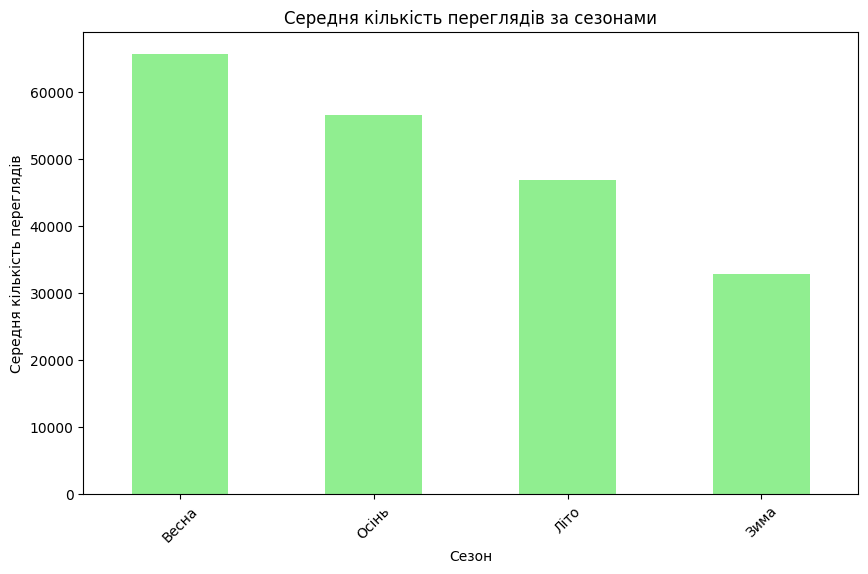

In [33]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Літо'
    else:
        return 'Осінь'

df['season'] = df['date'].dt.month.apply(get_season)

views_by_season = df.groupby('season')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
views_by_season.plot(kind='bar', color='lightgreen')
plt.title('Середня кількість переглядів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість переглядів')
plt.xticks(rotation=45)
plt.show()

#### 20 Скільки слів ворожнечі вжито?

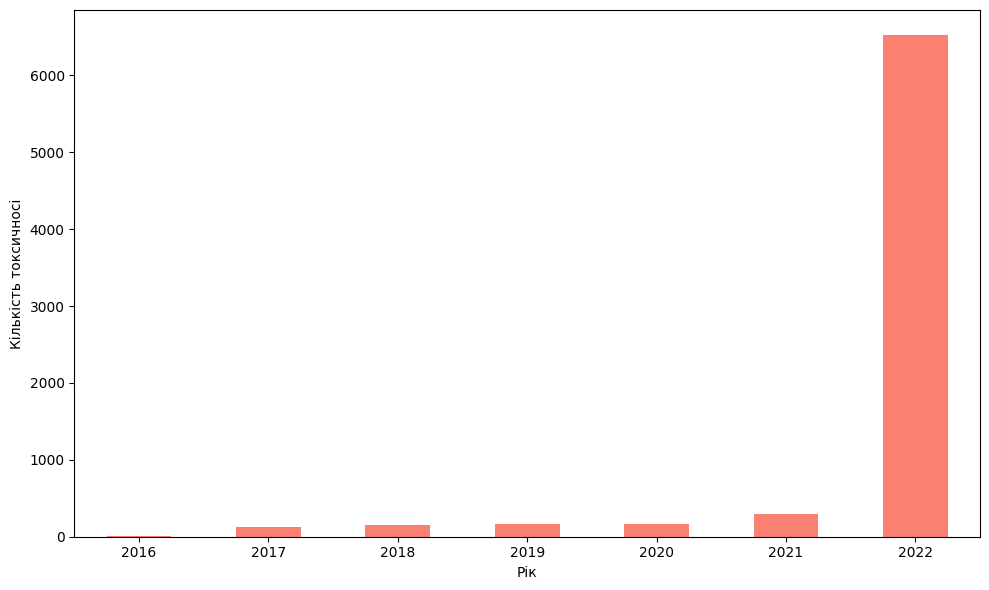

In [28]:
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

hokhly_mentions_per_year = df[df['message'].str.contains(r'\bхохлы\b', case=False, na=False)].groupby('year')['message'].count()

plt.figure(figsize=(10, 6))
hokhly_mentions_per_year.plot(kind='bar', color='salmon')
plt.xlabel('Рік')
plt.ylabel('Кількість токсичносі')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()